In [1]:
import pandas as pd
import random
import json
random.seed(8888)

In [2]:
movie_data = pd.read_csv('../data/movie_data.csv')
movie_data.dropna(subset=['year_released'], inplace=True)
drop_cols = ['image_url', 'imdb_id', 'imdb_link', 'tmdb_id', 'tmdb_link']
movie_data['year_released'] = movie_data['year_released'].astype('Int16')
movie_data['runtime'] = movie_data['runtime'].astype('Int16', errors='ignore')
movie_data.set_index('movie_id', inplace=True)

In [3]:
movie_data.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
movie_id,,,,,,,,,,,,,,,,,,
football-freaks,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971
aftermath-1960,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960
where-chimneys-are-seen,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953
the-musicians-daughter,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911
50-years-of-fabulous,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018


In [4]:
def format_movie_data(movie_data):
    """
    Converts a dictionary of movie data into a string format suitable for LLM fine-tuning.
    
    Args:
        movie_data (dict): A dictionary containing movie attributes such as title, language,
                           overview, and other metadata.
    
    Returns:
        str: A formatted string representation of the movie data.
    """
    # Define the order and the keys to include in the string
    keys_order = [
        "movie_title", "rating_val", "genres", "year_released", "popularity", "vote_average", "vote_count", "runtime", "production_countries", "original_language", "spoken_languages", "overview"
    ]
    
    # Building the string with key-value pairs
    formatted_string = " | ".join(f"{key}: {movie_data.get(key, 'N/A')}" for key in keys_order if key in movie_data)
    
    return formatted_string

In [5]:
import numpy as np

nan2list = lambda x: x if type(x) is str else '[]'

def format_movie_data_v2(movie_data): # , user_rating, user_review):
    release_yr = movie_data.get("year_released", None)
    title_fmt = movie_data.get("movie_title", "N/A") + (f" ({release_yr})" if release_yr else "")
    genre_fmt = ' and '.join([x.lower() for x in json.loads(nan2list(movie_data.get('genres', "[]")))])
    runtime = movie_data.get('runtime', None)
    if runtime is not None and not np.isnan(runtime):
        hours = int(runtime // 60)
        minutes = int(runtime % 60)
        runtime_fmt = f"{hours}h {minutes}m"
    else:
        runtime_fmt = "N/A"
    
    avg_rating = movie_data.get('vote_average')
    votes = movie_data.get('vote_count')
    if votes is not None and not np.isnan(votes) and votes > 0:
        votes = int(votes)
        avg_rating_fmt = f"{avg_rating:.2f} ({votes} vote(s))"
    else:
        avg_rating_fmt = "N/A"
    
    production_countries_fmt = ' and '.join(json.loads(nan2list(movie_data.get('production_countries', "[]")))) or 'N/A'
    languages_fmt = ' and '.join(json.loads(nan2list(movie_data.get('spoken_languages', "[]")))) or 'N/A'
    overview = movie_data.get("overview", "N/A")
    
    return f"""
Title: {title_fmt}
Genres: {genre_fmt}
Runtime: {runtime_fmt}
Average rating: {avg_rating_fmt}
Production countries: {production_countries_fmt}
Languages: {languages_fmt}
Overview: {overview}
""".strip()
        

In [6]:
print("Stringification V1")
print(format_movie_data(movie_data.iloc[100]))
print()
print("Stringification V2")
print(format_movie_data_v2(movie_data.iloc[100]))

Stringification V1
movie_title: Pelican Blood | genres: ["Drama"] | year_released: 2019 | popularity: 1.256 | vote_average: 6.3 | vote_count: 9.0 | runtime: 121.0 | production_countries: ["Bulgaria","Germany"] | original_language: de | spoken_languages: ["Magyar","Deutsch"] | overview: The horse trainer Wiebke adopts Raya from abroad, but soon she has to learn that the girl suffers from an attachment disorder and does not build an emotional connection to anybody around her. Raya constantly puts others in great danger, especially her older adoptive sister Nicolina. After a neurologist explains that Raya will have life-long troubles and does not feel any empathy, Wiebke has to decide whether she is willing to keep her and risk Nicolina’s well-being.

Stringification V2
Title: Pelican Blood (2019)
Genres: drama
Runtime: 2h 1m
Average rating: 6.30 (9 vote(s))
Production countries: Bulgaria and Germany
Languages: Magyar and Deutsch
Overview: The horse trainer Wiebke adopts Raya from abroad,

# user samples

In [7]:
ratings = pd.read_csv("../data/ratings_export.csv")
ratings.head()


,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


## Fine-tuning GPT2 model

We will stream this dataset, because it takes a while to precompute it. We would rather like to see the language model's progress as it trains.


In [8]:
import torch
import torch.utils.data
import tqdm

class MovieRatingDataset(torch.utils.data.Dataset):
    def __init__(self, ratings, n_context_movies: int):
        self.n_context_movies = n_context_movies
        
        user_counts = ratings.groupby('user_id').size().sort_values(ascending=False)
        user_ids = user_counts[user_counts > 10].index

        # Filter the ratings DataFrame to only include these users
        ratings = ratings[ratings['user_id'].isin(user_ids)]
        
        # Filter to movie ids that are in the movie index
        ratings = ratings[ratings['movie_id'].isin(movie_data.index)]
        
        # Generate rating spans
        rating_spans = []
        self.ratings_per_user = {}
        
        with tqdm.tqdm(user_ids, desc='Generating rating spans...') as pbar:
            grouped = ratings.groupby('user_id')
            for user_id in pbar:
                user_ratings = grouped.get_group(user_id)
                n_ratings = len(user_ratings)
                for start_i in range(0, max(1, n_ratings - n_context_movies)):
                    rating_spans.append((user_id, start_i, min(n_ratings, start_i + n_context_movies)))

                self.ratings_per_user[user_id] = user_ratings
                
        self.rating_spans = rating_spans
        
    def __len__(self):
        return len(self.rating_spans)
    
    def __getitem__(self, index: int):
        (user_id, start_index, end_index) = self.rating_spans[index]
        
        ratings = self.ratings_per_user[user_id].iloc[start_index:end_index]
        
        # Construct target string.
        target = ""
        for i, rating in ratings.iterrows():
            target += '---\n' + format_movie_data_v2(movie_data.loc[rating['movie_id']]) + f"\n---\nRating: {rating['rating_val']} / 10\n"
            
        return target


In [9]:
dataset = MovieRatingDataset(ratings, n_context_movies=10)

Generating rating spans...: 100%|██████████| 7366/7366 [00:04<00:00, 1642.10it/s]


In [10]:
import transformers

In [11]:
import os
os.environ['HUGGINGFACE_HUB_CACHE'] = '/scratch/gsk6me/huggingface_cache'

In [12]:
gpt2 = transformers.GPT2LMHeadModel.from_pretrained("openai-community/gpt2").to("cuda")
gpt2_tokenizer = transformers.GPT2Tokenizer.from_pretrained("openai-community/gpt2")

## First Approach: Non-Vectorized


In [ ]:
import torch
import torch.nn.functional as F
import wandb
import tqdm

wandb.init(project='letterboxd-rl-rec')

optimizer = torch.optim.Adam(gpt2.parameters(), lr=1e-4)

order = torch.randperm(len(dataset))
with tqdm.tqdm(range(100000), desc='Training') as pbar:
    for step in pbar:
        index = order[step]
        string = dataset[index]

        # Train to maximize the ll of this string.
        tokenization = gpt2_tokenizer(string, return_tensors='pt', truncation=True)['input_ids'].cuda()
        logits = gpt2(input_ids=tokenization).logits
        logprobs = torch.log_softmax(logits[:, :-1], dim=-1)
        logprobs_sel = logprobs[0, torch.arange(tokenization.shape[-1] - 1), tokenization[0, 1:]]
        loss = -logprobs_sel.mean()
        optimizer.zero_grad()
        loss.backward()
        wandb.log({"loss": loss.item()})
        optimizer.step()
        pbar.set_postfix(loss=loss.item())


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: myfatemi. Use `wandb login --relogin` to force relogin


Training:  18%|█▊        | 18194/100000 [41:41<3:07:07,  7.29it/s, loss=0.868] 

In [14]:
torch.save(optimizer, "optim.pt")
torch.save(gpt2, "model.pt")

In [36]:
tokenization = gpt2_tokenizer("---", return_tensors='pt', truncation=True).to('cuda')
results = gpt2.generate(**tokenization, max_new_tokens=500, temperature=1, repetition_penalty=1.25)
print(gpt2_tokenizer.decode(results[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


---
Title: The Man Who Fell to Earth (1976)  Space Chimps (1975)
Genres science fiction and adventure and family
Runtime: 1h 20m
Average rating score: 4.60 (12 vote(s))
Production countries: United States of America
Languages: English
Overview: A group of chimps are sent on a mission to find the mysterious "Man who Fell To Earth" who has been discovered by an alien civilization.
---
Rating: 5 / 10
---
Title : The Big Sick (2017)
Genres comedy legend Johnny Carson (1920 porter/porter)
Runtime: 0h 14m
Average rating N/A
Production countries Germany
Languages: Deutsch
Overview: In this short, he is a man who is in love with a woman. He's a man who loves women. He's also a man who loves women.
---
Rating: 6 /10
---
Title Samba (2018)
Genres action and thriller and comedy and drama
Runtime: 2h 8m Jump from Rio de Janeiro
Average rating.: 6.40 (1353 vote(s))
Production countries Australia and United Kingdom and United Statesofia and Chile and France and Germany and Japan and Mexico and Nethe

In [30]:
print(dataset[order[-1]])

---
Title: To Make a Killing (1988)
Genres: horror
Runtime: 1h 28m
Average rating: 7.00 (2 vote(s))
Production countries: Australia
Languages: English
Overview: Damon Kennedy (Tamblyn Lord, The River Kings) is an impressionable young man ready to begin university life. On the other side of the tracks live Terry (Craig Pearce, co-author of Strictly Ballroom), Felix (John Godden) and Benny (Kelly Dingwall) — who get their kicks out of robbing houses and chasing girls. But they're broke and all out of cash.  During a routine burglary the gang discover an innocent Damon. Brushing off the intrusion and pretending they are looking for some mates, the gang flee the scene but bored Damon follows them and joins their group for the day, hoping to find some fun.When the gang picks up two girls, things become unhinged as a drunk Damon brags about some of his family's many affluent friends. Forced to take them to one of his cash-rich contacts, Damon's nightmare has only just begun. As Terry discove

In [32]:
string = """
---
Title: To Make a Killing (1988)
Genres: horror
Runtime: 1h 28m
Average rating: 7.00 (2 vote(s))
Production countries: Australia
Languages: English
Overview: Damon Kennedy (Tamblyn Lord, The River Kings) is an impressionable young man ready to begin university life. On the other side of the tracks live Terry (Craig Pearce, co-author of Strictly Ballroom), Felix (John Godden) and Benny (Kelly Dingwall) — who get their kicks out of robbing houses and chasing girls. But they're broke and all out of cash.  During a routine burglary the gang discover an innocent Damon. Brushing off the intrusion and pretending they are looking for some mates, the gang flee the scene but bored Damon follows them and joins their group for the day, hoping to find some fun.When the gang picks up two girls, things become unhinged as a drunk Damon brags about some of his family's many affluent friends. Forced to take them to one of his cash-rich contacts, Damon's nightmare has only just begun. As Terry discovers that the wealthy don't always carry cash, what starts as a burglary soon turns into a killing spree.
---
Rating: 5 / 10
---
Title: The Return of Captain Invincible (1983)
Genres: fantasy and action and comedy and science fiction
Runtime: 1h 36m
Average rating: 6.70 (13 vote(s))
Production countries: Australia
Languages: English
Overview: In WWII, Captain Invincible used his superpowers against the Nazis and was hailed as a hero. But when he was accused of treason, he retired to Australia in disgrace. Cut to the present, when a US super secret super weapon is stolen and he's asked to come back to the States in order to help stop evil and restore his sterling reputation. Unfortunately, Captain Invincible is a drunk now...
---
Rating: 4 / 10
---
Title: Found Footage 3D (2016)
Genres: horror
Runtime: 1h 41m
Average rating: 5.30 (64 vote(s))
Production countries: United States of America
Languages: English
Overview: A group of filmmakers sets out to make the first 3D found footage horror movie, but find themselves IN the first 3D found footage horror movie when the evil entity from their film escapes into their behind-the-scenes footage.
---
Rating:
""".strip()

tokenization = gpt2_tokenizer(string, return_tensors='pt', truncation=True).to('cuda')
results = gpt2.generate(**tokenization, max_new_tokens=10, temperature=1)
print(gpt2_tokenizer.decode(results[0]))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


---
Title: To Make a Killing (1988)
Genres: horror
Runtime: 1h 28m
Average rating: 7.00 (2 vote(s))
Production countries: Australia
Languages: English
Overview: Damon Kennedy (Tamblyn Lord, The River Kings) is an impressionable young man ready to begin university life. On the other side of the tracks live Terry (Craig Pearce, co-author of Strictly Ballroom), Felix (John Godden) and Benny (Kelly Dingwall) — who get their kicks out of robbing houses and chasing girls. But they're broke and all out of cash.  During a routine burglary the gang discover an innocent Damon. Brushing off the intrusion and pretending they are looking for some mates, the gang flee the scene but bored Damon follows them and joins their group for the day, hoping to find some fun.When the gang picks up two girls, things become unhinged as a drunk Damon brags about some of his family's many affluent friends. Forced to take them to one of his cash-rich contacts, Damon's nightmare has only just begun. As Terry discove

## Evaluation

Given this trained model, let's see if the model is spending most of its "compute" on memorizing movie descriptions, or if it is spending most of it on learning the ratings!


In [87]:
# 10 = max rating sequence length
results_by_context_length = {i: ([], []) for i in range(10)}

with tqdm.tqdm(range(100000, 100100), desc='Evaluating') as pbar:
    for i in pbar:
        user_id, start, end = dataset.rating_spans[order[i]]

        rating_sequence = dataset.ratings_per_user[user_id].iloc[start:end]

        for ctx_len in range(len(rating_sequence)):
            visible_ratings = rating_sequence.iloc[:ctx_len]
            string = ''
            for i, rating in visible_ratings.iterrows():
                mv = movie_data.loc[rating['movie_id']]
                formatted = format_movie_data_v2(mv)
                string += f"---\n{formatted}\n---\nRating: {int(rating['rating_val'])} / 10\n"

            test_rating = rating_sequence.iloc[ctx_len]
            mv = movie_data.loc[test_rating['movie_id']]
            formatted = format_movie_data_v2(mv)
            string += f"---\n{formatted}\n---\nRating:"

            tokenization = gpt2_tokenizer(string, return_tensors='pt', truncation=True).to('cuda')
            if len(tokenization.input_ids[0]) > 1022:
                continue

            with torch.no_grad():
                out = gpt2.generate(**tokenization, max_new_tokens=1, do_sample=False, pad_token_id=gpt2_tokenizer.eos_token_id)
            out = gpt2_tokenizer.decode(out[0])
            try:
                pred_rating = int(out.split()[-1])
            except:
                print(out)
            true_rating = int(test_rating['rating_val'])

            results_by_context_length[ctx_len][0].append(pred_rating)
            results_by_context_length[ctx_len][1].append(true_rating)


Evaluating: 100%|██████████| 100/100 [00:38<00:00,  2.58it/s]


precision: 0.75, recall: 0.75
precision: 0.71, recall: 0.71
precision: 0.77, recall: 0.77
precision: 0.74, recall: 0.74
precision: 0.7, recall: 0.7
precision: 0.75, recall: 0.75
precision: 0.7368421052631579, recall: 0.7368421052631579
precision: 0.7090909090909091, recall: 0.7090909090909091
precision: 0.7727272727272727, recall: 0.7727272727272727
precision: 1.0, recall: 1.0


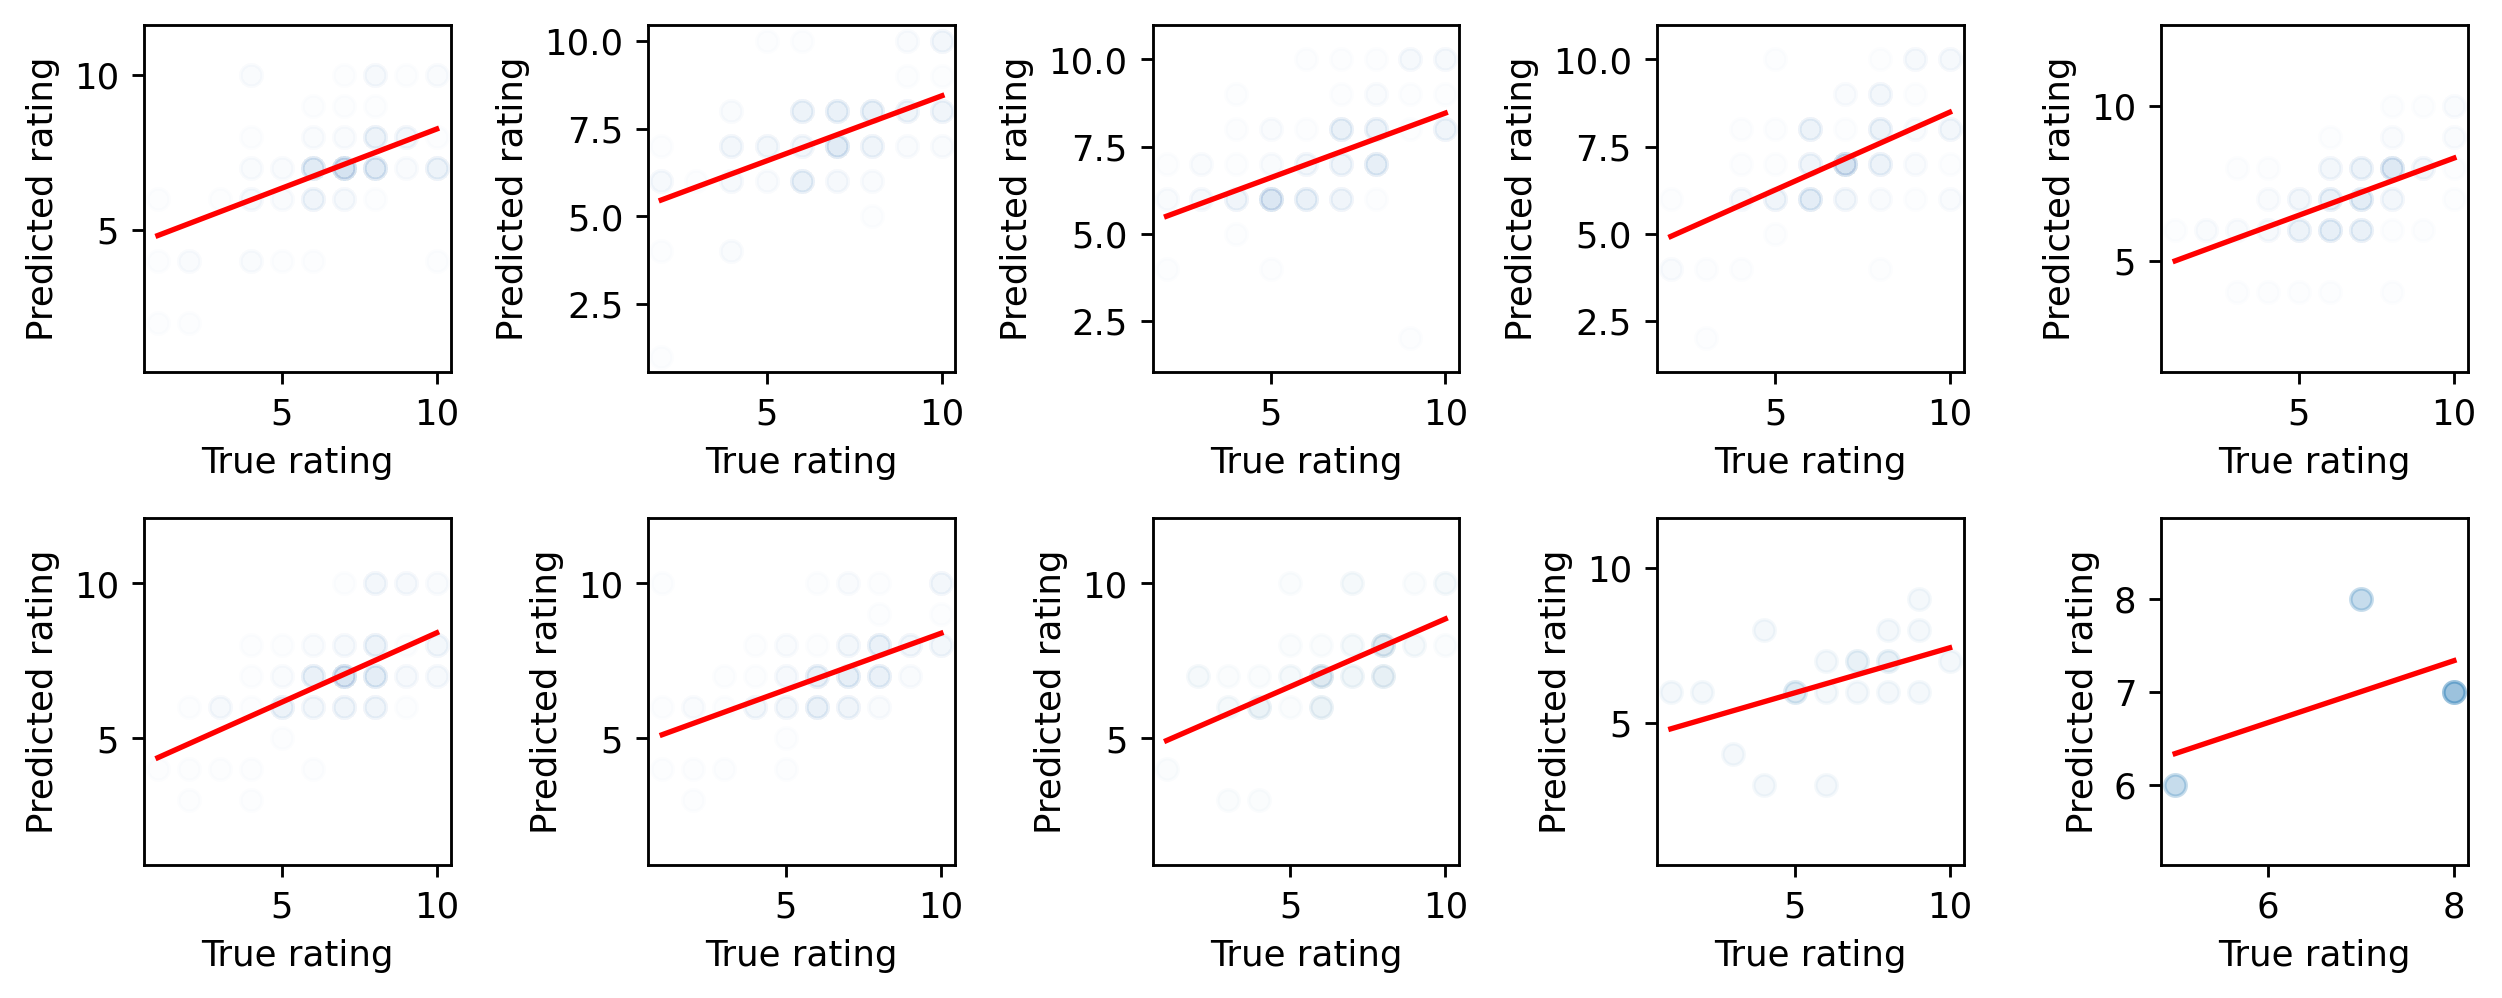

In [97]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 256
for i in range(10):
    pred, true = results_by_context_length[i]
    # create linear fit
    m,b = np.polyfit(true, pred, 1)
    plt.subplot(2, 5, i + 1)
    plt.scatter(true, pred, alpha=1/len(pred))
    min_true = min(true)
    max_true = max(true)
    plt.plot([min_true, max_true], [min_true * m + b, max_true * m + b], c='r')
    plt.xlabel("True rating")
    plt.ylabel("Predicted rating")
    plt.axis('equal')
    
    # Calculate "accuracy"
    pred = np.array(pred)
    true = np.array(true)
    tp = (pred >= 7) == (true >= 7)
    tn = (pred < 7) == (true < 7)
    fp = (pred >= 7) == (true < 7)
    fn = (pred < 7) == (true >= 7)
    precision = tp.sum()/(tp.sum()+fp.sum())
    recall = tp.sum()/(tp.sum()+fn.sum())
    print(f"precision: {precision}, recall: {recall}")

plt.tight_layout()
plt.show()

## Second Approach: Vectorized

In [ ]:
import torch
import torch.nn.functional as F
import wandb
import tqdm

# wandb.init(project='letterboxd-rl-rec')

optimizer = torch.optim.Adam(gpt2.parameters(), lr=1e-4)

order = torch.randperm(len(dataset))
with tqdm.tqdm(range(100000), desc='Training') as pbar:
    for step in pbar:
        index = order[step]
        string = dataset[index]

        # Train to maximize the ll of this string.
        tokens = gpt2_tokenizer(string, return_tensors='pt', truncation=True, padding='longest').to('cuda')
        logits = gpt2(**tokens).logits
        logprobs = torch.log_softmax(logits, dim=-1)
        
        for i, token in enumerate(tokens):
            logprobs_item = logprobs[i, :-1]
            logprobs_item[torch.arange(
        
        logprobs_sel = logprobs[0, torch.arange(tokenization.shape[-1] - 1), tokenization[0, 1:]]
        loss = -logprobs_sel.mean()
        optimizer.zero_grad()
        loss.backward()
        wandb.log({"loss": loss.item()})
        optimizer.step()
        pbar.set_postfix(loss=loss.item())


In [ ]:
# construct some strings for each of these users
def construct_ratings_set():
    user_ids = []
    rating_strings = []

    for user_id in tqdm.tqdm(users_filtered, desc='Creating dataset...'):
        user_ratings = filtered_ratings[filtered_ratings['user_id'] == user_id]

        # construct strings from each of these users
        user_rating_strings = []
        for rating_id, (_id, movie_id, rating_val, _user_id) in user_ratings.iterrows():
            if movie_id not in movie_data.index:
                continue
            movie_data = movie_data.loc[movie_id]
            user_rating_strings.append(format_movie_data_v2(movie_data, rating_val, "N/A"))
        user_ids.append(user_id)
        rating_strings.append(user_rating_strings)


In [ ]:
all_user_ids = filtered_ratings['user_id'].unique() 
random.shuffle(all_user_ids)
train_cutoff = int(len(all_user_ids)*4/5)
train_movie_ids = all_user_ids[:train_cutoff]
test_movie_ids = all_user_ids[train_cutoff:]

In [ ]:
train_movie_ids[0]

In [37]:
training_samples = []
system_prompt = "A movie recommendation system which takes in a list of movies and outputs the title of the next movie to watch. Only output the title of the movie."
user_history = "I have watched the following movies:\n"

for user in train_movie_ids[:1]:
    rating_history = filtered_ratings[filtered_ratings['user_id'] == user]
    combined = rating_history.merge(movie_data, on='movie_id')
    combined['movie_string'] = combined.apply(format_movie_data, axis=1)

    # split data into groups of 11 where 10 are the user's history and the last is the next movie to watch
    for i in range(0, len(combined), 10):
        if i + 10 >= len(combined):
            break
        watch_history = user_history + "\n".join(combined['movie_string'][i:i+10])
        next_movie = combined['movie_title'][i+10]
        sample = {
            "messages": 
                [
                    {"role": "system", "content": f"{system_prompt}"}, 
                    {"role": "user", "content": f"{watch_history}"}, 
                    {"role": "assistant", "content": f"{next_movie}"}
                ]
        }
        training_samples.append(sample)

with open('training_samples.jsonl', 'w') as file:
    for sample in training_samples:
        json_line = json.dumps(sample)
        file.write(json_line + '\n')

In [ ]:
client = OpenAI()
job_id = ""
client.fine_tuning.jobs.retrieve(f"{job_id}")

In [ ]:
# client = OpenAI()
# completion = client.chat.completions.create(
#   model="ft:gpt-3.5-turbo:my-org:custom_suffix:id",
#   messages=[
#     {"role": "system", "content": "You are a helpful assistant."},
#     {"role": "user", "content": "Hello!"}
#   ]
# )
# print(completion.choices[0].message)